In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy
from scipy.stats import norm 
import statistics

In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
age_mean = df["age"].mean()
age_mean

41.88585600000013

In [4]:
count_male = 0
for gender in df["gender"]:
    if gender == "Male":
        count_male += 1
print(count_male)

41430


In [5]:
total = len(df)
male = df[df['gender'] == 'Male'].shape[0]
print(male)
P_M = male / total

print(P_M)

41430
0.4143


In [6]:
total = len(df)
diabetes = df[df['diabetes'] == 1].shape[0]

P_D = diabetes / total

print(P_D)

0.085


In [7]:
total = len(df)
male_and_diabetes = df[(df['gender'] == 'Male') & (df['diabetes'] == 1)].shape[0]
diabetes = df[df['diabetes'] == 1].shape[0]

P_M_D = male_and_diabetes / diabetes

print(P_M_D)


0.4751764705882353


In [8]:
P_D_M = (P_M_D * P_D)/P_M
P_D_M

0.0974897417330437

In [9]:
total = len(df)
P_M_D =  male_and_diabetes / male

print(P_M_D)


0.09748974173304369


In [10]:
age_mean

41.88585600000013

In [11]:
std_age = df["age"].std()
std_age

22.51683987161513

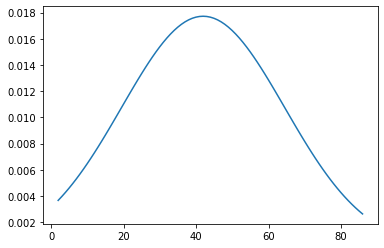

In [39]:
x_axis = np.arange(age_mean-40, age_mean+45)
plt.plot(x_axis, norm.pdf(x_axis, age_mean, std_age)) 
plt.show() 

In [14]:
mean_bmi = df["bmi"].mean()
mean_bmi

27.32076709999422

In [15]:
std_bmi = df["bmi"].std()
std_bmi

6.636783416649581

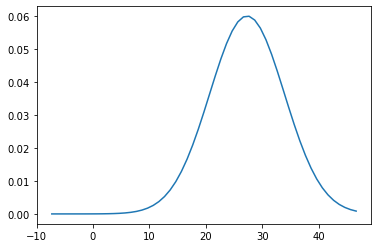

In [18]:
x_axis = np.arange(20-mean_bmi, mean_bmi+20)
plt.plot(x_axis, norm.pdf(x_axis, mean_bmi, std_bmi)) 
plt.show() 

In [19]:
HB_mean = df["HbA1c_level"].mean()
HB_mean

5.5275069999983275

In [20]:
HB_std = df["HbA1c_level"].std()
HB_std

1.0706720918832282

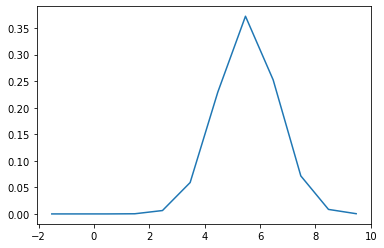

In [21]:
x_axis = np.arange(4-HB_mean, HB_mean+4)
plt.plot(x_axis, norm.pdf(x_axis, HB_mean, HB_std)) 
plt.show() 

In [22]:
gulucose_mean = df["blood_glucose_level"].mean()
gulucose_mean

138.05806

In [23]:
gulocose_std = df["blood_glucose_level"].std()
gulocose_std

40.70813604870113

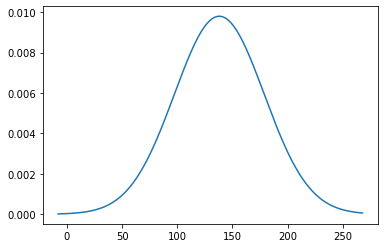

In [24]:
x_axis = np.arange(130-gulucose_mean, gulucose_mean+130)
plt.plot(x_axis, norm.pdf(x_axis, gulucose_mean, gulocose_std)) 
plt.show() 

In [25]:
df[["age", "bmi", "HbA1c_level", "blood_glucose_level"]].corr()

,age,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.337396,0.101354,0.110672
bmi,0.337396,1.000000,0.082997,0.091261
HbA1c_level,0.101354,0.082997,1.000000,0.166733
blood_glucose_level,0.110672,0.091261,0.166733,1.000000


In [26]:
df[["age", "bmi", "HbA1c_level", "blood_glucose_level"]].cov()

,age,bmi,HbA1c_level,blood_glucose_level
age,507.008078,50.420219,2.443449,101.444257
bmi,50.420219,44.046894,0.589763,24.656192
HbA1c_level,2.443449,0.589763,1.146339,7.267066
blood_glucose_level,101.444257,24.656192,7.267066,1657.152341


In [28]:
diabetes_df = df[df['diabetes'] == 1]
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1


In [66]:
non_diabetes_df = df[df['diabetes'] == 0]
non_diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [45]:
diabetes_mean = diabetes_df[["age","bmi","HbA1c_level","blood_glucose_level"]].mean().values
diabetes_mean

array([ 60.94658824,  31.98838235,   6.93495294, 194.09470588])

In [68]:
non_diabetes_mean = non_diabetes_df[["age","bmi","HbA1c_level","blood_glucose_level"]].mean().values
non_diabetes_mean

array([ 40.11518689,  26.8871635 ,   5.39676066, 132.85246995])

In [53]:
diabetes_cov = diabetes_df[["age","bmi","HbA1c_level","blood_glucose_level"]].cov().values
diabetes_cov

array([[ 2.11698994e+02, -1.58240163e+01,  5.16162317e-03,
         1.27411456e+01],
       [-1.58240163e+01,  5.71289670e+01, -1.29553288e-01,
         9.85119685e-01],
       [ 5.16162317e-03, -1.29553288e-01,  1.15898641e+00,
        -6.06958127e-01],
       [ 1.27411456e+01,  9.85119685e-01, -6.06958127e-01,
         3.43877995e+03]])

In [102]:
non_diabetes_cov = non_diabetes_df[["age","bmi","HbA1c_level","blood_glucose_level"]].cov().values
non_diabetes_cov

array([[ 4.97557853e+02,  4.75412798e+01, -5.36997192e-02,
         1.24374504e+00],
       [ 4.75412798e+01,  4.06202996e+01, -1.03891927e-02,
         3.00034099e-01],
       [-5.36997192e-02, -1.03891927e-02,  9.44061245e-01,
        -8.75231323e-03],
       [ 1.24374504e+00,  3.00034099e-01, -8.75231323e-03,
         1.17287627e+03]])

In [103]:
# sample = diabetes_df[["age","bmi","HbA1c_level","blood_glucose_level"]].values
# sample

In [126]:
obs = [67,27.32,6.5,200]

In [119]:
from scipy.stats import multivariate_normal
diab1 = multivariate_normal.pdf(obs,diabetes_mean,diabetes_cov)
diab1

2.6378211697247485e-06

In [120]:
from scipy.stats import multivariate_normal
diab0 = multivariate_normal.pdf(obs,non_diabetes_mean,non_diabetes_cov)
diab0

1.9800728095389856e-07

In [121]:
total = len(df)
diabetes = df[df['diabetes'] == 1].shape[0]

P_D = diabetes / total

print(P_D)

0.085


In [122]:
total = len(df)
diabetes = df[df['diabetes'] == 0].shape[0]

P_D_1 = diabetes / total

print(P_D_1)

0.915


In [123]:
ans = (diab1*P_D)/(diab0*P_D_1)
ans

1.2375479096556534

In [124]:
if ans > 1:
    print("Diabetes")
else:
    print("Non Diabetes")

Diabetes


In [125]:
non_diabetes_df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0
